# Answers to assignment #1 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 과제

과제에서 주어진 변형은 다음과 같은 세 파라미터로 표현이 될 수 있다.

$l_0=10$ [mm] $, l_f=20$ [mm] and $t=10$ [sec].

In [3]:
## define a few variables that describe the problem
l0=10.        # [mm]
lf=20.        # [mm]
total_time=10 # [sec]

변형이 일어나는 동안 변형의 속도가 다음과 같이 정의됨에 유의하자 i.e., $v=\frac{l_f-l_0}{t}$

In [4]:
v=(lf-l0)/total_time # the velocity remains constant.

In [5]:
print 'velocity:',v, '[mm/s]'

velocity: 1.0 [mm/s]


앞서서 우리는 진변형률을 구하기 위해서 엔지니어링 변형률을 시간의 축에서 단계별로 쪼개어 수치적으로 구하였다. 예를 들어, 주어진 총 시간을 10번의 스텝을 통해서 나타내기 위해서 우리는 0에서 부터 10초의 11계 시간 값을 가진 "stamp"를 다음과 같이 numpy.linspace 함수를 사용하여 만들었다.

In [8]:
nt = 10
times=np.linspace(0,total_time,nt+1)
print times

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


- 주어진 문제에서 '변형률의 시간당 변화량' 즉 주어진 step들 간의 시간 변화량과, 변형률의 변화량을 바탕으로 각 구간의 변형률의 시간 변화량 (변형률 레이트)를 구할 수 있음에 주목하자.
- 따라서, 각 스텝 사이의 delta time ($\Delta t$)을 마련해 놓으면 나머지 task도 쉽게 풀이가 될 것이다.
- 아래에서 np.diff 함수를 사용하여 $\Delta t$ 을 구하였다.

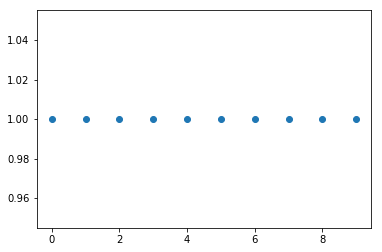

In [9]:
dtimes = np.diff(times) # a pro tip (or cheat?)
# np.diff returns...
plot(dtimes,'o')

np.diff가 없이도 $\Delta t$를 다음과 같이 구할 수 있다.

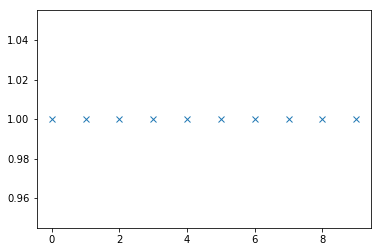

In [10]:
dtimes=[]
for i in xrange(nt):
    dtimes.append(times[i+1]-times[i])
plot(dtimes,'x')

In [11]:
dtimes

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

- 위에서 우리는 상수의 $\Delta t$를 바탕으로 $t^1, t^2, t^3 ... t^n$ 값들을 마련해놓았음에 주목하자.

## 다음으로 우리는 각 $t^1, t^2, t^3 ... t^n$ 값들에 대한 $\frac{\Delta \epsilon^n}{\Delta t^n}$ (여기서 n=1 ... n까지) 를 구하겠다.

여기서 변형률 레이트 $\dot{\epsilon}$ 는 다름이 아니라 $\Delta t$ 가 무한대 일때의 $\frac{\Delta\epsilon}{\Delta t}$ 값임을 이해하자 (즉, $\dot{\epsilon}=\frac{d \epsilon}{dt}$)

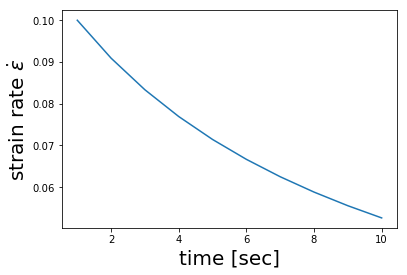

In [8]:
engineering_strain_at_current_time=[]
length_stamps=[l0] ## 각 (n=1,2, ... n 일때의 길이)

## a list that will collect 'strain rate' increment
strain_rate = []
l_current=l0

for i in xrange(nt): # iteration over the time stamps     (n=1,2,... n)

    l_current = l_current+v*dtimes[i]
    length_stamps.append(l_current)
    
    ## 아래는 주어진 step i에서의 1) 길이, 2) delta (engineering) strain, 3) delta time, 
    ## 4) 그리고 마지막으로 delta(engineering strain)/ delta (time) 즉 strain rate의 근사값이다.

    # length change
    delta_l = length_stamps[i+1] - length_stamps[i]
    
    # engineering strain
    delta_epsilon = delta_l / (length_stamps[i])
    
    # time increment?
    delta_t = dtimes[i] # time increment
    
    # engineering strain rate?
    epsilon_dot = delta_epsilon / delta_t
    
    ## add epsilon_dot to strain_rate:
    strain_rate.append(epsilon_dot)
    
    #plot(i,delta_t,'.')
    #plot(i,delta_l,'bs',mfc='None')
    #plot(i,v,mec='r',mfc='None',marker='+',) # velocity

    
plot(times[1:],strain_rate)
xlabel('time [sec]',dict(fontsize=20))
ylabel(r'strain rate $\dot{\epsilon}$',dict(fontsize=20))

여러 변수, 즉 (l0, lf, n) 값에 따라 달라지는 시간 stamp, strain rate를 반복적으로 또 편리하게 구하기 위해서는 함수를 이용할 수 있다.
아래에 예는 위의 cell을 '함수'로 다시 쓴 결과이다. 함수가 총 세가지 즉 $l_0, l_f, $ 그리고 총 time step의 수 $n$을 input으로 하고, output으로 그에 따른 time stamps, 그리고 strain rate를 돌려주는 형식을 취함에 유의하자.

In [9]:
def calc_strain_rate(l0,lf,n):
    """
    Arguments
    ---------
    l0: initial length
    lf: final length
    n: total number of time steps
    """
    engineering_strain_at_current_time=[]
    length_stamps=[l0]
    
    v = 1.
    t = (lf-l0)/v

    times=np.linspace(0,t,n+1)
    dtimes=np.diff(times)

    ## a list that will collect 'strain rate' increment
    strain_rate = []

    l_current=l0
    for i in xrange(n): # iteration over the time stamps    

        l_current = l_current+v*dtimes[i]
        length_stamps.append(l_current)

        # length change
        delta_l = length_stamps[i+1] - length_stamps[i]
    
        # engineering strain
        delta_epsilon = delta_l / (length_stamps[i])
    
        # time increment?
        delta_t = dtimes[i] # time increment
    
        # engineering strain rate?
        epsilon_dot = delta_epsilon / delta_t
    
        ## add epsilon_dot to strain_rate:
        strain_rate.append(epsilon_dot)
        
    return times,strain_rate

## 위의 함수를 각 조건에 '반복하여' 그리고 다른 input 조합을 사용하여 결과를 그려보자

v: 1.0
t: 10.0
v: 1.0
t: 8.0
v: 1.0
t: 15.0
v: 1.0
t: 10.0


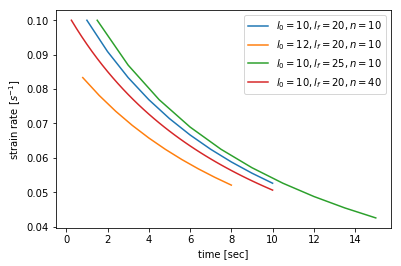

In [10]:
times,strain_rate=calc_strain_rate(l0=10.,lf=20.,n=10)
plot(times[1:],strain_rate,label=r'$l_0=10, l_f=20, n=10$')
times,strain_rate=calc_strain_rate(l0=12.,lf=20.,n=10)
plot(times[1:],strain_rate,label=r'$l_0=12, l_f=20, n=10$')
times,strain_rate=calc_strain_rate(l0=10.,lf=25.,n=10)
plot(times[1:],strain_rate,label=r'$l_0=10, l_f=25, n=10$')
times,strain_rate=calc_strain_rate(l0=10.,lf=20.,n=40)
plot(times[1:],strain_rate,label=r'$l_0=10, l_f=20, n=40$')

ylabel(r'strain rate $[s^{-1}]$')
xlabel('time [sec]')
legend()

gcf().savefig('images/assignment_01-05.png')

## 마찬가지로, 위의 함수를 사용하여 $l_0=10 [mm]$ 그리고 $l_f=20 [mm]$ 일때 time step의 수를 늘림에 따라 마지막 strain rate가 어떻게 변하는지 살펴보도록 하자.

v: 1.0
t: 10.0
v: 1.0
t: 10.0
v: 1.0
t: 10.0
v: 1.0
t: 10.0
v: 1.0
t: 10.0
v: 1.0
t: 10.0
v: 1.0
t: 10.0
v: 1.0
t: 10.0
0.0500978473581


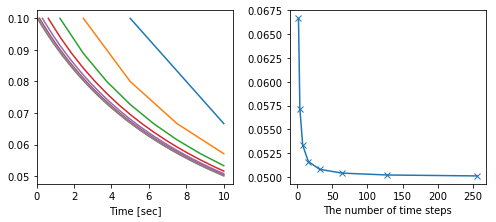

In [11]:
fig=plt.figure(figsize=(7,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ns=np.arange(1,9)
#ns=[1,10,50,100]
ns=2**ns #(2^1, 2^2, 2^3 ... 2^9)
eps=[]
for i in xrange(len(ns)):
    times,strain_rate=calc_strain_rate(l0=10,lf=20,n=ns[i])
    eps.append(strain_rate[-1])
    ax1.plot(times[1:],strain_rate,label=r'n=$%i^%i$')

ax1.set_xlim(0.,)
ax2.plot(ns,eps,'-x')
tight_layout()

print strain_rate[-1]

ax1.set_xlabel('Time [sec]')
ax2.set_xlabel('The number of time steps')
gcf().savefig('images/assignment_additional.png')

## Can you obtain this answer using an analytical approach?

- 진변형률의 무한소 $d\varepsilon$ 는 다음과 같이 정의된다: $\frac{dl}{l}$.

- 주어진 문제는 $\dot{\varepsilon}$값 즉 $\frac{d\varepsilon}{dt}$ 값이 주어진 변형이 마무리 되었을 때 어떤 값을 가지는지 묻고 있다.

- 위의 관계식의 무한소 $d\varepsilon$ 값에 첫번째 관계식을 대입하면,
$\dot{\varepsilon}=\frac{dl/l}{dt}=\frac{1}{l}\frac{dl}{dt}$ 값을 가진다.

- 앞서 길의 변화 속도 $\frac{dl}{dt} $=(v) 가 주어진 변형동안 1 [mm/sec] 값으로 유지된다고 하였다.

- 그리고 주어진 조건에의 최종 길이는 l=20 [mm] 값이므로, 위의 '해석적' 방법을 통해서

$\varepsilon$ at l=20 [mm] 값을 구하자면

In [12]:
1./20. * v

0.05

값이 된다.

## 위의 해석적 방법과 앞선 수치적 방법의 결과를 비교해보자.

v: 1.0
t: 10.0
v: 1.0
t: 10.0


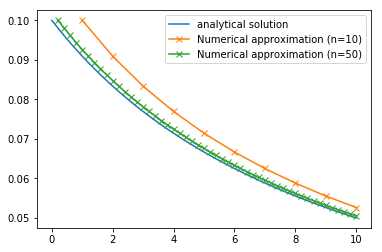

In [13]:
total_time=10.
nstep=10
l0=10.
lf=20.
v=(lf-l0)/total_time

## 해석적 방법 (edot = 1/l v)
l=l0+v*times[:]
plot(times[:],1/l*v,'-',label='analytical solution')


## 수치적 방법
times,strain_rate=calc_strain_rate(l0=l0,lf=lf,n=10)
plot(times[1:],strain_rate,'-x',label='Numerical approximation (n=10)')

times,strain_rate=calc_strain_rate(l0=l0,lf=lf,n=50)
plot(times[1:],strain_rate,'-x',label='Numerical approximation (n=50)')

legend()